# <a>1. Import libraries and load the data

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import os

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(os.getcwd() + "\\Data")

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Course\\8. Projects\\FLIGHT PRICE\\Data'

In [27]:
flight_data = pd.read_csv("Flight price.csv")
df = flight_data.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2021 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2021 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [29]:
time_data = ["Date_of_Journey", "Dep_Time", "Arrival_Time"]
for i in time_data:
    df[i] = pd.to_datetime(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [30]:
df.set_index("Date_of_Journey", inplace = True)

In [31]:
df["Dep_Time"] = df["Dep_Time"].dt.time
df["Arrival_Time"] = df["Arrival_Time"].dt.time

In [32]:
df["Duration"] = pd.to_timedelta(df["Duration"])

In [33]:
df["Duration"] = df["Duration"].apply(lambda x : pd.to_datetime(str(x).split()[-1]))

In [34]:
df["Duration"] = df["Duration"].dt.time

In [35]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_of_Journey,,,,,,,,,,
2019-03-24,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20:00,01:10:00,02:50:00,non-stop,No info,3897
2019-01-05,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50:00,13:15:00,07:25:00,2 stops,No info,7662
2019-09-06,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25:00,04:25:00,19:00:00,2 stops,No info,13882
2019-12-05,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05:00,23:30:00,05:25:00,1 stop,No info,6218
2019-01-03,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50:00,21:35:00,04:45:00,1 stop,No info,13302


In [36]:
for i in df:
    print(i, df[i].nunique())

Airline 12
Source 5
Destination 6
Route 128
Dep_Time 222
Arrival_Time 223
Duration 284
Total_Stops 5
Additional_Info 10
Price 1870


In [37]:
df.drop(["Route", "Arrival_Time", "Dep_Time"], axis = 1, inplace = True)

# <a>2. Handeling missing / null values

In [38]:
import datetime

In [39]:
for i in df:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
02:50:00    569
01:30:00    407
02:55:00    381
02:35:00    368
02:45:00    341
           ... 
07:10:00      2
13:35:00      1
19:50:00      1
18:05:00      1
03:30:00      1
Name: Duration, Length: 284, dtype: int6

In [40]:
df.drop("Additional_Info", axis = 1, inplace = True)

In [41]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    1
Price          0
dtype: int64

In [43]:
df[df["Total_Stops"].isnull() == True]

,Airline,Source,Destination,Duration,Total_Stops,Price
Date_of_Journey,,,,,,
2019-06-05,Air India,Delhi,Cochin,23:40:00,NaN,7480


In [44]:
df1 = df[(df["Source"] == "Delhi") & (df["Destination"] == "Cochin") & (df["Airline"] == "Air India") & (df["Duration"] == datetime.time(23, 40))]

In [45]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Price
Date_of_Journey,,,,,,
2019-09-03,Air India,Delhi,Cochin,23:40:00,2 stops,10660
2019-05-24,Air India,Delhi,Cochin,23:40:00,1 stop,7480
2019-03-06,Air India,Delhi,Cochin,23:40:00,2 stops,10975
2019-06-27,Air India,Delhi,Cochin,23:40:00,2 stops,10975
2019-05-15,Air India,Delhi,Cochin,23:40:00,2 stops,10975
2019-05-15,Air India,Delhi,Cochin,23:40:00,1 stop,7480
2019-03-27,Air India,Delhi,Cochin,23:40:00,2 stops,7090
2019-05-18,Air India,Delhi,Cochin,23:40:00,1 stop,8372
2019-01-04,Air India,Delhi,Cochin,23:40:00,1 stop,5117


In [46]:
df1["Total_Stops"].value_counts()    

2 stops    14
1 stop     12
Name: Total_Stops, dtype: int64

In [48]:
df["Total_Stops"].fillna("2 stops", inplace = True)

# <a>3. Outliers Treatement

In [50]:
df_num = df.select_dtypes(include = "int64")
df_num.head()

,Price
Date_of_Journey,
2019-03-24,3897
2019-01-05,7662
2019-09-06,13882
2019-12-05,6218
2019-01-03,13302


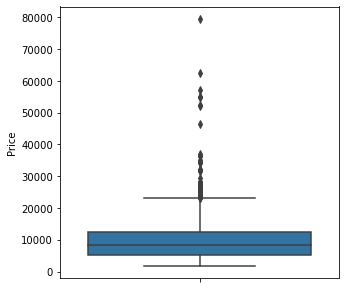

In [51]:
plt.figure(figsize = (5,5))

ax = plt.subplot(111)
sns.boxplot(y = df_num[i]) 
plt.show()


In [52]:
import scipy.stats as stat
import pylab 

# Q-Q Plot function
def plot_data(df,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist = 'norm',plot=pylab)
    plt.show()

# <a>3.1 Quantile Method

In [53]:
df_QM = df_num.copy()
q1,q3 = df_QM["Price"].quantile([.25,.75])

IQR = q3-q1

lower_out = q1-1.5*IQR
print(lower_out)

upper_out = q3+1.5*IQR
print(upper_out)

-5367.0
23017.0


In [54]:
lower_out = 0

In [55]:
df_QM.loc[(df_QM["Price"]) >= upper_out, "Price"] = upper_out
df_QM.loc[(df_QM["Price"]) <= lower_out, "Price"] = lower_out

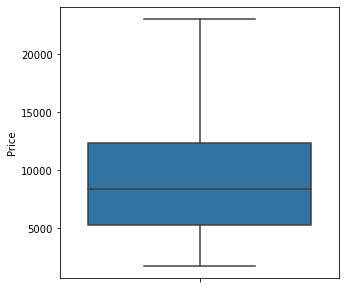

In [56]:
plt.figure(figsize = (5,5))

ax = plt.subplot(111)
sns.boxplot(y = df_QM[i]) 
plt.show()

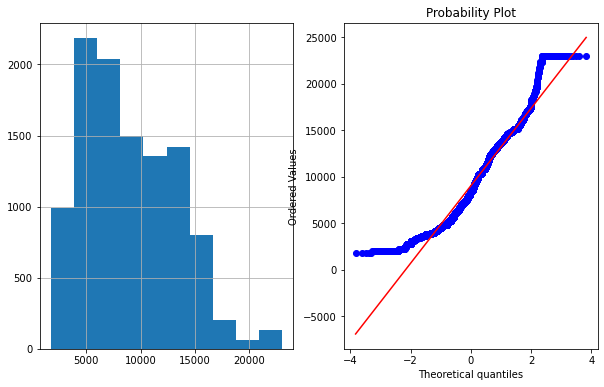

In [57]:
plot_data(df_QM, "Price")

In [58]:
max(df_QM["Price"])

23017

In [59]:
min(df_QM["Price"])

1759

# <a>3.2 3-sigma Method

In [60]:
df_SM = df_num.copy()

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


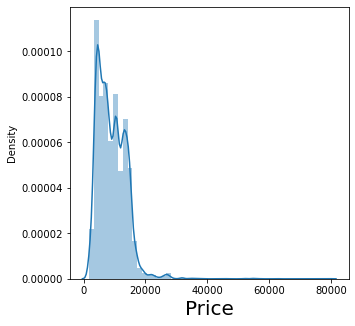

In [61]:
plt.figure(figsize = (5,5))

ax = plt.subplot(111)
sns.distplot(df_SM["Price"])
plt.xlabel("Price",fontsize = 20)

plt.show()

In [62]:
min_3sigma,max_3sigma = (df_SM["Price"].mean()-(3*(df_SM["Price"].std()))),(df_SM["Price"].mean()+(3*(df_num["Price"].std()))) 
min_3sigma,max_3sigma

(-4747.013379885886, 22921.141621016657)

In [63]:
min_3sigma = 0

In [65]:
df_SM.loc[df_SM["Price"] <= min_3sigma, "Price"] = min_3sigma
df_SM.loc[df_SM["Price"] >= max_3sigma, "Price"] = max_3sigma
df_SM.head()

,Price
Date_of_Journey,
2019-03-24,3897.0
2019-01-05,7662.0
2019-09-06,13882.0
2019-12-05,6218.0
2019-01-03,13302.0


H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


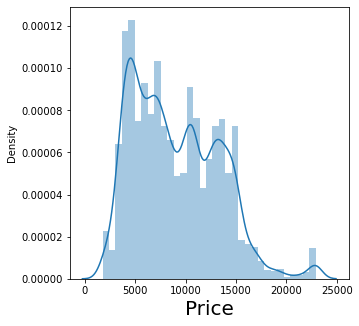

In [66]:
plt.figure(figsize = (5,5))

ax = plt.subplot(111)
sns.distplot(df_SM["Price"])
plt.xlabel("Price",fontsize = 20)

plt.show()

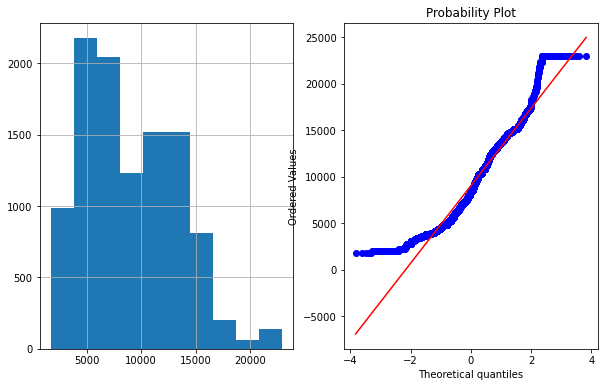

In [67]:
plot_data(df_SM, "Price")

In [68]:
max(df_SM["Price"])

22921.141621016657

In [69]:
min(df_SM["Price"])

1759.0

# <a>3.3 Isolation Forest

In [70]:
df_IF = df_num.copy()

In [71]:
from sklearn.ensemble import IsolationForest

In [72]:
iso = IsolationForest(contamination = .1, n_estimators = 10000)

In [73]:
my_model = iso.fit(df_IF)

In [74]:
df_IF["outlier"] = my_model.predict(df_IF)

In [75]:
final = df_IF.loc[df_IF["outlier"] == 1]

In [84]:
final.head()

,Price,outlier
Date_of_Journey,,
2019-03-24,3897,1
2019-01-05,7662,1
2019-09-06,13882,1
2019-12-05,6218,1
2019-01-03,13302,1


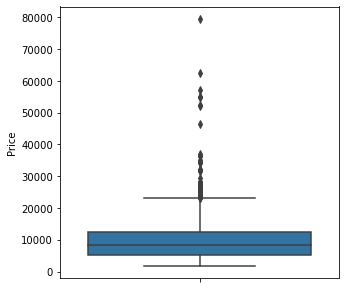

In [77]:
plt.figure(figsize = (5,5))

ax = plt.subplot(111)
sns.boxplot(y = df_IF[i]) 
plt.show()

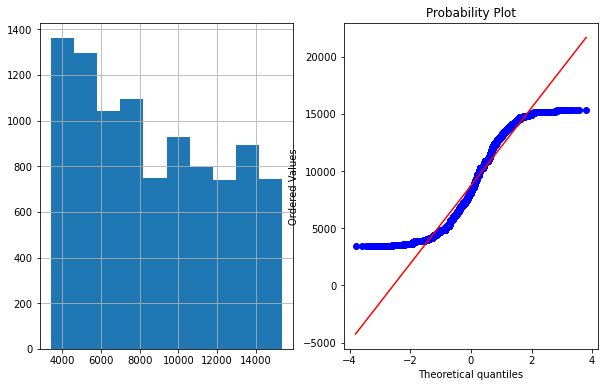

In [78]:
plot_data(final, "Price")

# <a>3.4 Best Method - 3-Sigma Method

In [79]:
df_ob = df.drop(df_num, axis = 1)

In [80]:
df = pd.concat([df_ob,df_SM], axis = 1)

In [81]:
df["Price"] = df["Price"].apply(lambda x : round(x,2))

In [82]:
max(df["Price"])

22921.14

In [85]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price
Date_of_Journey,,,,,,
2019-03-24,IndiGo,Banglore,New Delhi,02:50:00,non-stop,3897.0
2019-01-05,Air India,Kolkata,Banglore,07:25:00,2 stops,7662.0
2019-09-06,Jet Airways,Delhi,Cochin,19:00:00,2 stops,13882.0
2019-12-05,IndiGo,Kolkata,Banglore,05:25:00,1 stop,6218.0
2019-01-03,IndiGo,Banglore,New Delhi,04:45:00,1 stop,13302.0


In [57]:
'''df_ob = df_ob.set_index(df_ob.groupby(level = 0).cumcount(), append = True)
df_out = df_out.set_index(df_out.groupby(level = 0).cumcount(), append = True)
result = pd.concat([df_ob, df_out], axis = 1, ignore_index = True).reset_index(drop = True, level = 1)
result.columns = df.columns
result'''

'df_ob = df_ob.set_index(df_ob.groupby(level = 0).cumcount(), append = True)\ndf_out = df_out.set_index(df_out.groupby(level = 0).cumcount(), append = True)\nresult = pd.concat([df_ob, df_out], axis = 1, ignore_index = True).reset_index(drop = True, level = 1)\nresult.columns = df.columns\nresult'

In [58]:
#result[result["Price"].isnull() == True]

# <a>4. Handling Categorical Data

In [86]:
df_ob = df.select_dtypes(include = "object")

In [87]:
df_num = df_ob.drop(df_ob, axis = 1)

In [88]:
df_ob.head()

,Airline,Source,Destination,Duration,Total_Stops
Date_of_Journey,,,,,
2019-03-24,IndiGo,Banglore,New Delhi,02:50:00,non-stop
2019-01-05,Air India,Kolkata,Banglore,07:25:00,2 stops
2019-09-06,Jet Airways,Delhi,Cochin,19:00:00,2 stops
2019-12-05,IndiGo,Kolkata,Banglore,05:25:00,1 stop
2019-01-03,IndiGo,Banglore,New Delhi,04:45:00,1 stop


In [90]:
df_ob.drop("Duration", axis = 1, inplace = True)

H:\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
df_ob["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [93]:
df_ob["Total_Stops"] = df_ob["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'], [0,2,1,3,4])

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
df_ob["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [92]:
df_ob["Destination"] = df_ob["Destination"].replace("New Delhi", "Delhi")

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_ob["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [99]:
df_dict = {"Delhi" : 0,
           "Banglore" : 1,
           "Kolkata" : 2,
           "Chennai" : 3,
           "Mumbai" : 4,
           "Hyderabad" : 5,
           "Cochin" : 6}
df_ob["Source"] = df_ob["Source"].map(df_dict)
df_ob["Destination"] = df_ob["Destination"].map(df_dict)
df_ob.head()

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
H:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Airline,Source,Destination,Total_Stops
Date_of_Journey,,,,
2019-03-24,IndiGo,1,0,0
2019-01-05,Air India,2,1,2
2019-09-06,Jet Airways,0,6,2
2019-12-05,IndiGo,2,1,1
2019-01-03,IndiGo,1,0,1


In [95]:
df_ob["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [96]:
for i in df_ob:
    print(i, df_ob[i].nunique())

Airline 12
Source 5
Destination 5
Total_Stops 5


# <a>4.1 Mean Encoding

In [117]:
df_ME = df_ob.copy()
df_ME["Price"] = df["Price"]

In [118]:
for i in df_ME:
    mean_ordinal = df_ME.groupby([i])["Price"].mean().to_dict()
    df_ME[i] = df_ME[i].map(mean_ordinal)

In [119]:
for i in df_ME:
    print(i, df_ME[i].nunique())

Airline 12
Source 5
Destination 5
Total_Stops 5
Price 1825


# <a>4.4 Best Method

In [120]:
df_num = df.drop(df_ob, axis = 1)

In [122]:
df_num.head()

,Duration,Price
Date_of_Journey,,
2019-03-24,02:50:00,3897.0
2019-01-05,07:25:00,7662.0
2019-09-06,19:00:00,13882.0
2019-12-05,05:25:00,6218.0
2019-01-03,04:45:00,13302.0


In [125]:
df_new = pd.concat([df_ME["Airline"], df_ob.drop("Airline", axis = 1), df_num], axis = 1)

In [126]:
df_new.head()

,Airline,Source,Destination,Total_Stops,Duration,Price
Date_of_Journey,,,,,,
2019-03-24,5673.682903,1,0,0,02:50:00,3897.0
2019-01-05,9578.351655,2,1,2,07:25:00,7662.0
2019-09-06,11546.513110,0,6,2,19:00:00,13882.0
2019-12-05,5673.682903,2,1,1,05:25:00,6218.0
2019-01-03,5673.682903,1,0,1,04:45:00,13302.0


# <a>5. Feature Selection

In [127]:
df_FS = df_new.copy()

In [141]:
X = df_new.iloc[:,:-2]
y = df_new['Price']

## <a>5.1 Wrapper Method (OLS Method)

In [129]:
import statsmodels.api as sm

In [143]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Airline', 'Source', 'Destination', 'Total_Stops']


## <a>5.2 Embedded Method (Feature Importance)

### <a>5.2.1 Lasso Regression

In [131]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel

In [144]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 7274.893555
Best score using built-in LassoCV: 0.401364


In [145]:
imp_coef = coef.sort_values()

Text(0.5, 1.0, 'Feature importance using Lasso Model')

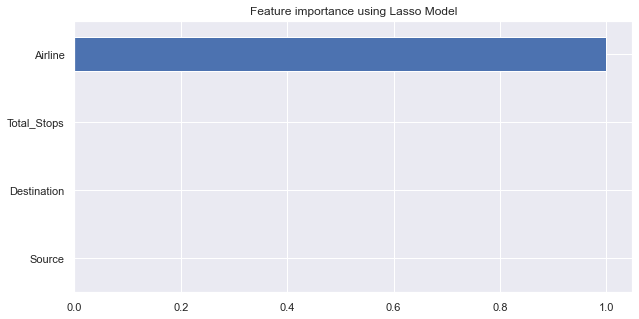

In [154]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [147]:
ls = SelectFromModel(Lasso(alpha = 7274.89,random_state=0))
ls.fit(X,y)
ls.get_support()

selected_features = X.columns[(ls.get_support())]

selected_features

Index(['Airline'], dtype='object')

## <a>5.3 Filter Method

### <a>5.3.1 f_regression

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [148]:
skb = SelectKBest(score_func = f_regression, k = "all")
skb.fit(X,y)
score = pd.DataFrame(skb.scores_)
score

,0
0,7161.253796
1,1317.422511
2,438.332940
3,7686.803027


In [149]:
col = X.columns
col = pd.DataFrame(col)
col

,0
0,Airline
1,Source
2,Destination
3,Total_Stops


In [150]:
fea_imp = pd.concat([col,score], axis=1)
fea_imp.columns = ["features","f-score"]
fea_imp1 = fea_imp.nlargest(10,"f-score")
fea_imp1

,features,f-score
3,Total_Stops,7686.803027
0,Airline,7161.253796
1,Source,1317.422511
2,Destination,438.332940


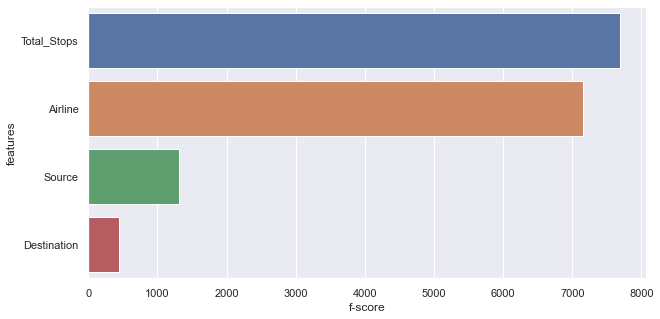

In [153]:
plt.figure(figsize = (10,5))
sns.barplot(y = "features", x="f-score", data=fea_imp1)
sns.set(rc = {"figure.figsize":(18,10)})

## <a>5.4 Correlation

<AxesSubplot:>

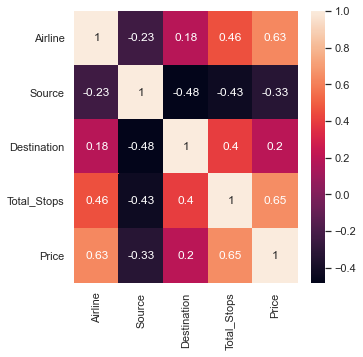

In [157]:
corr = df_new.iloc[:,:].corr()
top_features = corr.index
plt.figure(figsize = (5,5))
sns.heatmap(df_new[top_features].corr(),annot=True)

In [158]:
corr_target = abs(corr["Price"])
corr_target[corr_target > .5]

Airline        0.633534
Total_Stops    0.646911
Price          1.000000
Name: Price, dtype: float64

## <a>5.5 Features Selected

In [171]:
df_FS = df_new.drop("Duration", axis = 1)

In [172]:
df_FS.head()

,Airline,Source,Destination,Total_Stops,Price
Date_of_Journey,,,,,
2019-03-24,5673.682903,1,0,0,3897.0
2019-01-05,9578.351655,2,1,2,7662.0
2019-09-06,11546.513110,0,6,2,13882.0
2019-12-05,5673.682903,2,1,1,6218.0
2019-01-03,5673.682903,1,0,1,13302.0


# <a>6. Standarization

In [163]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_FS)
df_scaled = pd.DataFrame(df_scaled, columns = df_FS.columns)
df_scaled.head()

,Airline,Source,Destination,Total_Stops,Price
0,-1.241050,-0.093541,-1.215057,-1.220713,-1.203564
1,0.206624,0.748329,-0.837059,1.741103,-0.319220
2,0.936329,-0.935411,1.052932,1.741103,1.141768
3,-1.241050,0.748329,-0.837059,0.260195,-0.658395
4,-1.241050,-0.093541,-1.215057,0.260195,1.005535


In [178]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df_FS), columns = df_FS.columns)
df_minmax.head()

,Airline,Source,Destination,Total_Stops,Price
0,0.081661,0.25,0.000000,0.00,0.101029
1,0.289565,0.50,0.166667,0.50,0.278942
2,0.394359,0.00,1.000000,0.50,0.572863
3,0.081661,0.50,0.166667,0.25,0.210706
4,0.081661,0.25,0.000000,0.25,0.545455


# <a>7. Linear Regression

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [174]:
X = df_scaled.iloc[:,:-1]
#X = pd.concat([X,df_FS["Duration"]], axis = 1)
y = df_FS["Price"]

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
lr = LinearRegression()
lin_model = lr.fit(X_train,Y_train)

In [175]:
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.5706775494675285
0.5716287656239694


In [176]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [177]:
Y_pred=lin_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

7835870.313866355
2799.2624589106244


H:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

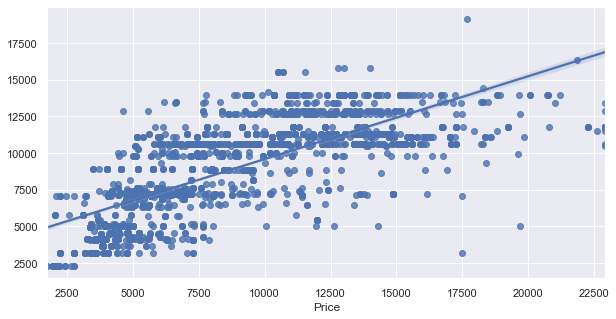

In [179]:
sns.regplot(Y_test,Y_pred)

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

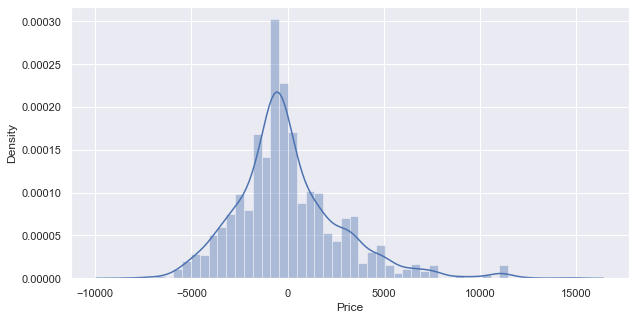

In [180]:
sns.distplot(Y_test-Y_pred)

In [181]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [182]:
alphas = np.random.uniform(low = 0, high = 10000, size = (500,))
ridgecv = RidgeCV(alphas = alphas,cv = 10,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([4.18129272e+03, 4.12385660e+02, 4.66664109e+03, 7.27212415e+03,
       5.24669375e+03, 9.90535132e+03, 7.67468676e+03, 4.91892524e+03,
       2.85398356e+03, 7.32191165e+03, 1.50135958e+03, 6.35293282e+03,
       6.88884644e+03, 1.82101638e+03, 7.52201911e+03, 3.99581824e+03,
       8.68433645e+03, 5.05562722e+03, 7.39722480e+03, 9.68920846e+03,
       9.42648759e+03, 8.72140841e+0...
       4.66710686e+03, 3.21171755e+03, 6.46427817e+03, 1.08219691e+03,
       1.97903552e+03, 5.42683422e+02, 4.81520517e+03, 2.27564309e+03,
       4.71543911e+03, 3.44040277e+03, 4.30772248e+03, 8.73915670e+02,
       3.57964012e+03, 6.73307468e+03, 3.33323601e+03, 2.87601950e+03,
       9.00779420e+03, 9.62318945e+03, 1.91054624e+03, 9.39275011e+00,
       3.29412399e+02, 8.16628459e+03, 7.01899022e+03, 9.74631456e+03]),
        cv=10, normalize=True)

In [183]:
ridgecv.alpha_

9.392750109612491

In [184]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
rid_model=ridge_model.fit(X_train,Y_train)

print(rid_model.score(X_train,Y_train))
print(rid_model.score(X_test,Y_test))

0.5706770481386131
0.5716257357399462


In [185]:
alphas = np.random.uniform(low=0, high=10000, size=(500,))
lassocv = LassoCV(alphas = None,cv=10,normalize = True,max_iter=10000)
lassocv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [186]:
lassocv.alpha_

0.0306549049577169

In [187]:
lasso_model=Lasso(alpha=lassocv.alpha_)
las_model=lasso_model.fit(X_train,Y_train)

print(las_model.score(X_train,Y_train))
print(las_model.score(X_test,Y_test))

0.5706775492207345
0.5716290285654391


In [188]:
elasticCV = ElasticNetCV(alphas = None , cv = 10, max_iter = 10000, normalize = True)
elasticCV.fit(X_train, Y_train)

ElasticNetCV(cv=10, max_iter=10000, normalize=True)

In [189]:
elasticCV.alpha_

0.061309809915433805

In [190]:
elasticCV.l1_ratio

0.5

In [191]:
elastic_model=ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elas_model=elastic_model.fit(X_train, Y_train)

print(elas_model.score(X_train,Y_train))
print(elas_model.score(X_test,Y_test))

0.570356056667982
0.5712425879401792


In [192]:
Y_pred=lin_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

7835870.313866355
2799.2624589106244


In [193]:
Y_pred=rid_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

7835925.737238342
2799.2723585314707


In [194]:
Y_pred=las_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

7835865.504077341
2799.2615997932994


In [195]:
Y_pred=elas_model.predict(X_test)

print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))

7842934.369539227
2800.523945539339
